In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

import seaborn as sns
import os
import json
from translator import translator
import pickle

In [2]:
keywords = ["ἀλγέω", "ἄλγημα", "ἄλγος", "λυπέω", "λύπη", "λυπηρός", "ὀδυνάω", "ὀδύνη", "πονέω", "πόνος"]

In [3]:
keyed_vectors_full = KeyedVectors.load("../data/keyed_vectors_full.wv")
keyed_vectors_excl_arist = KeyedVectors.load("../data/keyed_vectors_excl_arist.wv")
keyed_vectors_excl_plato = KeyedVectors.load("../data/keyed_vectors_excl_plato.wv")
keyed_vectors_excl_hipp = KeyedVectors.load("../data/keyed_vectors_excl_hipp.wv")
vectors_list = [keyed_vectors_full, keyed_vectors_excl_arist, keyed_vectors_excl_plato, keyed_vectors_excl_hipp]

In [6]:
word_freqs = pickle.load(open("../data/word_freqs_all.pickle", "rb"))
word_freqs_dict = dict(word_freqs)

In [7]:
# load our list of words with assigned categories:
terms_translation_categories = pickle.load(open("../data/terms_translation_categories.pickle", "rb"))
terms_translation_categories

,greek,english,category,count
249,ἀγαθός,good,moral,8832
6,κακός,bad,moral,4780
209,σῶμα,body,bodily parts,4651
32,φίλος,"loved, beloved, dear",moral,3534
248,ἀδικέω,to do wrong,moral,2134
94,ἄξιος,weighing as much,moral,1622
259,ἡδονή,pleasure,opossite,1602
106,σῴζω,preserve,opossite,1274
241,ἡδύς,plaesant,opossite,1239
163,πόνος,"hardship, pain",pain,1118


In [8]:
categories = ['pain',
              'suffering',
              'pathology',
              'bodily parts',
              'dietetics',
              'emotion',
              'moral',
              'opossite']

In [9]:
terms_translation_categories.groupby("category").size()

category
bodily parts    48
dietetics       61
emotion         31
moral           56
opossite        29
pain            16
pathology       49
suffering       15
dtype: int64

In [10]:
cat_terms_dict = {}
for cat in categories:
    terms = terms_translation_categories[terms_translation_categories["category"]==cat]["greek"].tolist()
    cat_terms_dict[cat] = terms

In [11]:
cat_terms_dict

{'pain': ['πόνος',
  'πονηρός',
  'ὀδύνη',
  'λύπη',
  'λυπέω',
  'ἀλγέω',
  'ἄλγημα',
  'λυπηρός',
  'ἄλγος',
  'ὀδυνάω',
  'ἄχος',
  'ἐπίπονος',
  'ἀλγηδών',
  'ὀδυνώδης',
  'ἀλγεινός',
  'ὠδίς'],
 'suffering': ['κίνδυνος',
  'ἁμαρτάνω',
  'τάλας',
  'αἰσχύνω',
  'διάκειμαι',
  'ὀργίζω',
  'ὄλλυμι',
  'λοιδορέω',
  'τλήμων',
  'ἄτη',
  'θυμόω',
  'μοχθηρία',
  'ἀηδής',
  'κατακτείνω',
  'βαρύνω'],
 'pathology': ['πυρετός',
  'ἕλκος',
  'θερμαίνω',
  'βάρος',
  'θερμότης',
  'γῆρας',
  'ῥῖγος',
  'σπασμός',
  'βήξ',
  'πυός',
  'ὄγκος',
  'ὀλέθριος',
  'οἴδημα',
  'φλεγμαίνω',
  'σπάω',
  'σήπω',
  'θανάσιμος',
  'καῦμα',
  'θανατώδης',
  'θέρμη',
  'χαλεπαίνω',
  'ἑλκόω',
  'οἰδέω',
  'ἀσώδης',
  'κακοδαίμων',
  'πυκνότης',
  'δυσεντερία',
  'σπασμώδης',
  'στάζω',
  'φρίκη',
  'κατάψυξις',
  'κωματώδης',
  'καῦσος',
  'φλεγμονή',
  'διάρροια',
  'διαθερμαίνω',
  'βήσσω',
  'πυρεταίνω',
  'φόνιος',
  'χλιαρός',
  'ἱμάς',
  'φρικώδης',
  'φρενιτικός',
  'ῥιγόω',
  'ὕφαιμος',
  'σαπρός

In [503]:
n = 10
sim_tups = []
for keyword in keywords:
    for cat in categories:
        sim = np.round(keyed_vectors_full.n_similarity([keyword], cat_terms_dict[cat][:n]), 4)
        norm_sim = np.round((sim + 1) / 2, 4)
        sim_tups.append((keyword, cat, sim, norm_sim))

In [504]:
sim_tups

[('ἀλγέω', 'pain', 0.6422, 0.8211),
 ('ἀλγέω', 'suffering', 0.3224, 0.6612),
 ('ἀλγέω', 'pathology', 0.2954, 0.6477),
 ('ἀλγέω', 'bodily parts', 0.3143, 0.6572),
 ('ἀλγέω', 'dietetics', 0.1594, 0.5797),
 ('ἀλγέω', 'emotion', 0.2743, 0.6372),
 ('ἀλγέω', 'moral', 0.1741, 0.587),
 ('ἀλγέω', 'opossite', 0.2497, 0.6248),
 ('ἄλγημα', 'pain', 0.6331, 0.8165),
 ('ἄλγημα', 'suffering', 0.0427, 0.5214),
 ('ἄλγημα', 'pathology', 0.5968, 0.7984),
 ('ἄλγημα', 'bodily parts', 0.553, 0.7765),
 ('ἄλγημα', 'dietetics', 0.1855, 0.5927),
 ('ἄλγημα', 'emotion', -0.046, 0.477),
 ('ἄλγημα', 'moral', -0.089, 0.4555),
 ('ἄλγημα', 'opossite', -0.088, 0.456),
 ('ἄλγος', 'pain', 0.5738, 0.7869),
 ('ἄλγος', 'suffering', 0.4608, 0.7304),
 ('ἄλγος', 'pathology', 0.3161, 0.6581),
 ('ἄλγος', 'bodily parts', 0.3099, 0.6549),
 ('ἄλγος', 'dietetics', 0.1898, 0.5949),
 ('ἄλγος', 'emotion', 0.3034, 0.6517),
 ('ἄλγος', 'moral', 0.1346, 0.5673),
 ('ἄλγος', 'opossite', 0.1565, 0.5782),
 ('λυπέω', 'pain', 0.5469, 0.7734),
 ('

In [505]:
def get_sim_tups(keyed_vectors, n=10):
    sim_tups = []
    for keyword in keywords:
        for cat in categories:
            sim = np.round(keyed_vectors.n_similarity([keyword], cat_terms_dict[cat][:n]), 4)
            norm_sim = np.round((sim + 1) / 2, 4)
            sim_tups.append((keyword, cat, sim, norm_sim))
    return sim_tups

In [506]:
coords = []
for n_lower in range(len(keywords)):
    for n_upper in range(len(categories)):
        xs, ys = [n_lower, n_upper+1], [0,2]
        coords.append((xs, ys))
        print(xs, ys)

[0, 1] [0, 2]
[0, 2] [0, 2]
[0, 3] [0, 2]
[0, 4] [0, 2]
[0, 5] [0, 2]
[0, 6] [0, 2]
[0, 7] [0, 2]
[0, 8] [0, 2]
[1, 1] [0, 2]
[1, 2] [0, 2]
[1, 3] [0, 2]
[1, 4] [0, 2]
[1, 5] [0, 2]
[1, 6] [0, 2]
[1, 7] [0, 2]
[1, 8] [0, 2]
[2, 1] [0, 2]
[2, 2] [0, 2]
[2, 3] [0, 2]
[2, 4] [0, 2]
[2, 5] [0, 2]
[2, 6] [0, 2]
[2, 7] [0, 2]
[2, 8] [0, 2]
[3, 1] [0, 2]
[3, 2] [0, 2]
[3, 3] [0, 2]
[3, 4] [0, 2]
[3, 5] [0, 2]
[3, 6] [0, 2]
[3, 7] [0, 2]
[3, 8] [0, 2]
[4, 1] [0, 2]
[4, 2] [0, 2]
[4, 3] [0, 2]
[4, 4] [0, 2]
[4, 5] [0, 2]
[4, 6] [0, 2]
[4, 7] [0, 2]
[4, 8] [0, 2]
[5, 1] [0, 2]
[5, 2] [0, 2]
[5, 3] [0, 2]
[5, 4] [0, 2]
[5, 5] [0, 2]
[5, 6] [0, 2]
[5, 7] [0, 2]
[5, 8] [0, 2]
[6, 1] [0, 2]
[6, 2] [0, 2]
[6, 3] [0, 2]
[6, 4] [0, 2]
[6, 5] [0, 2]
[6, 6] [0, 2]
[6, 7] [0, 2]
[6, 8] [0, 2]
[7, 1] [0, 2]
[7, 2] [0, 2]
[7, 3] [0, 2]
[7, 4] [0, 2]
[7, 5] [0, 2]
[7, 6] [0, 2]
[7, 7] [0, 2]
[7, 8] [0, 2]
[8, 1] [0, 2]
[8, 2] [0, 2]
[8, 3] [0, 2]
[8, 4] [0, 2]
[8, 5] [0, 2]
[8, 6] [0, 2]
[8, 7] [0, 2]
[8, 8]

In [507]:
list(mcolors.TABLEAU_COLORS.values())

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [508]:
#palette = ["#191970", "#006400", "#ff0000", "#ffd700", "#00ff00", "#00ffff", "#ff00ff", "#ffb6c1"]
#palette = list(mcolors.TABLEAU_COLORS.values())[:len(categories)]
#color_dict = dict(zip(categories, palette))
color_dict = {'opossite': '#7f7f7f',
              'emotion': '#8c564b',
              'pathology': '#ff7f0e',#2ca02c',
              'suffering': '#d62728',
              'moral': '#9467bd',
              'pain': 'tab:olive',#, '#ff7f0e', #8c564b',
              'dietetics': '#e377c2',
              'bodily parts': '#1f77b4'}

(-0.4, 9.4, -0.4, 2.4)

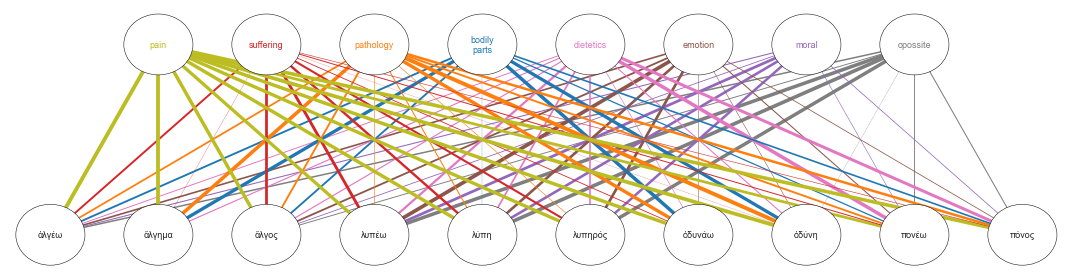

In [509]:
width_coef = 6
fig, ax = plt.subplots( figsize=(15, 4), tight_layout=True)

for n, word in enumerate(keywords):
    ax.text(x=n, y=0, s=word, fontsize=9,  horizontalalignment='center', verticalalignment='center') # color=color_dict[word],
    circle = patches.Circle(xy=(n, 0), radius=0.32, facecolor="white", linewidth=0.5, edgecolor="black", zorder=2)
    ax.add_patch(circle)
for n, word in enumerate(categories):
    ax.text(x=n+1, y=2, s="\n".join(word.split()), fontsize=9, horizontalalignment='center', verticalalignment='center', color=color_dict[word])
    circle = patches.Circle(xy=(n+1, 2), radius=0.32, facecolor="white", linewidth=0.5, edgecolor="black", zorder=2)
    ax.add_patch(circle)

for tup, coord in zip(sim_tups, coords):
    if tup[2] > 0:
        ax.plot(coord[0], coord[1], linewidth=tup[2]*width_coef, zorder=1, color=color_dict[tup[1]])

ax.set_xlim(-0.4, len(keywords) - 0.6)
ax.set_ylim(-0.4, 2.4)
ax.axis(False)
#ax.set_title("(A) 450BCE-150BCE", fontsize=8)

In [510]:
titles = ["full corpus",
          "excluding C. Aristotelicum",
          "excluding C. Platonicum",
          "excluding C. Hippocraticum"]

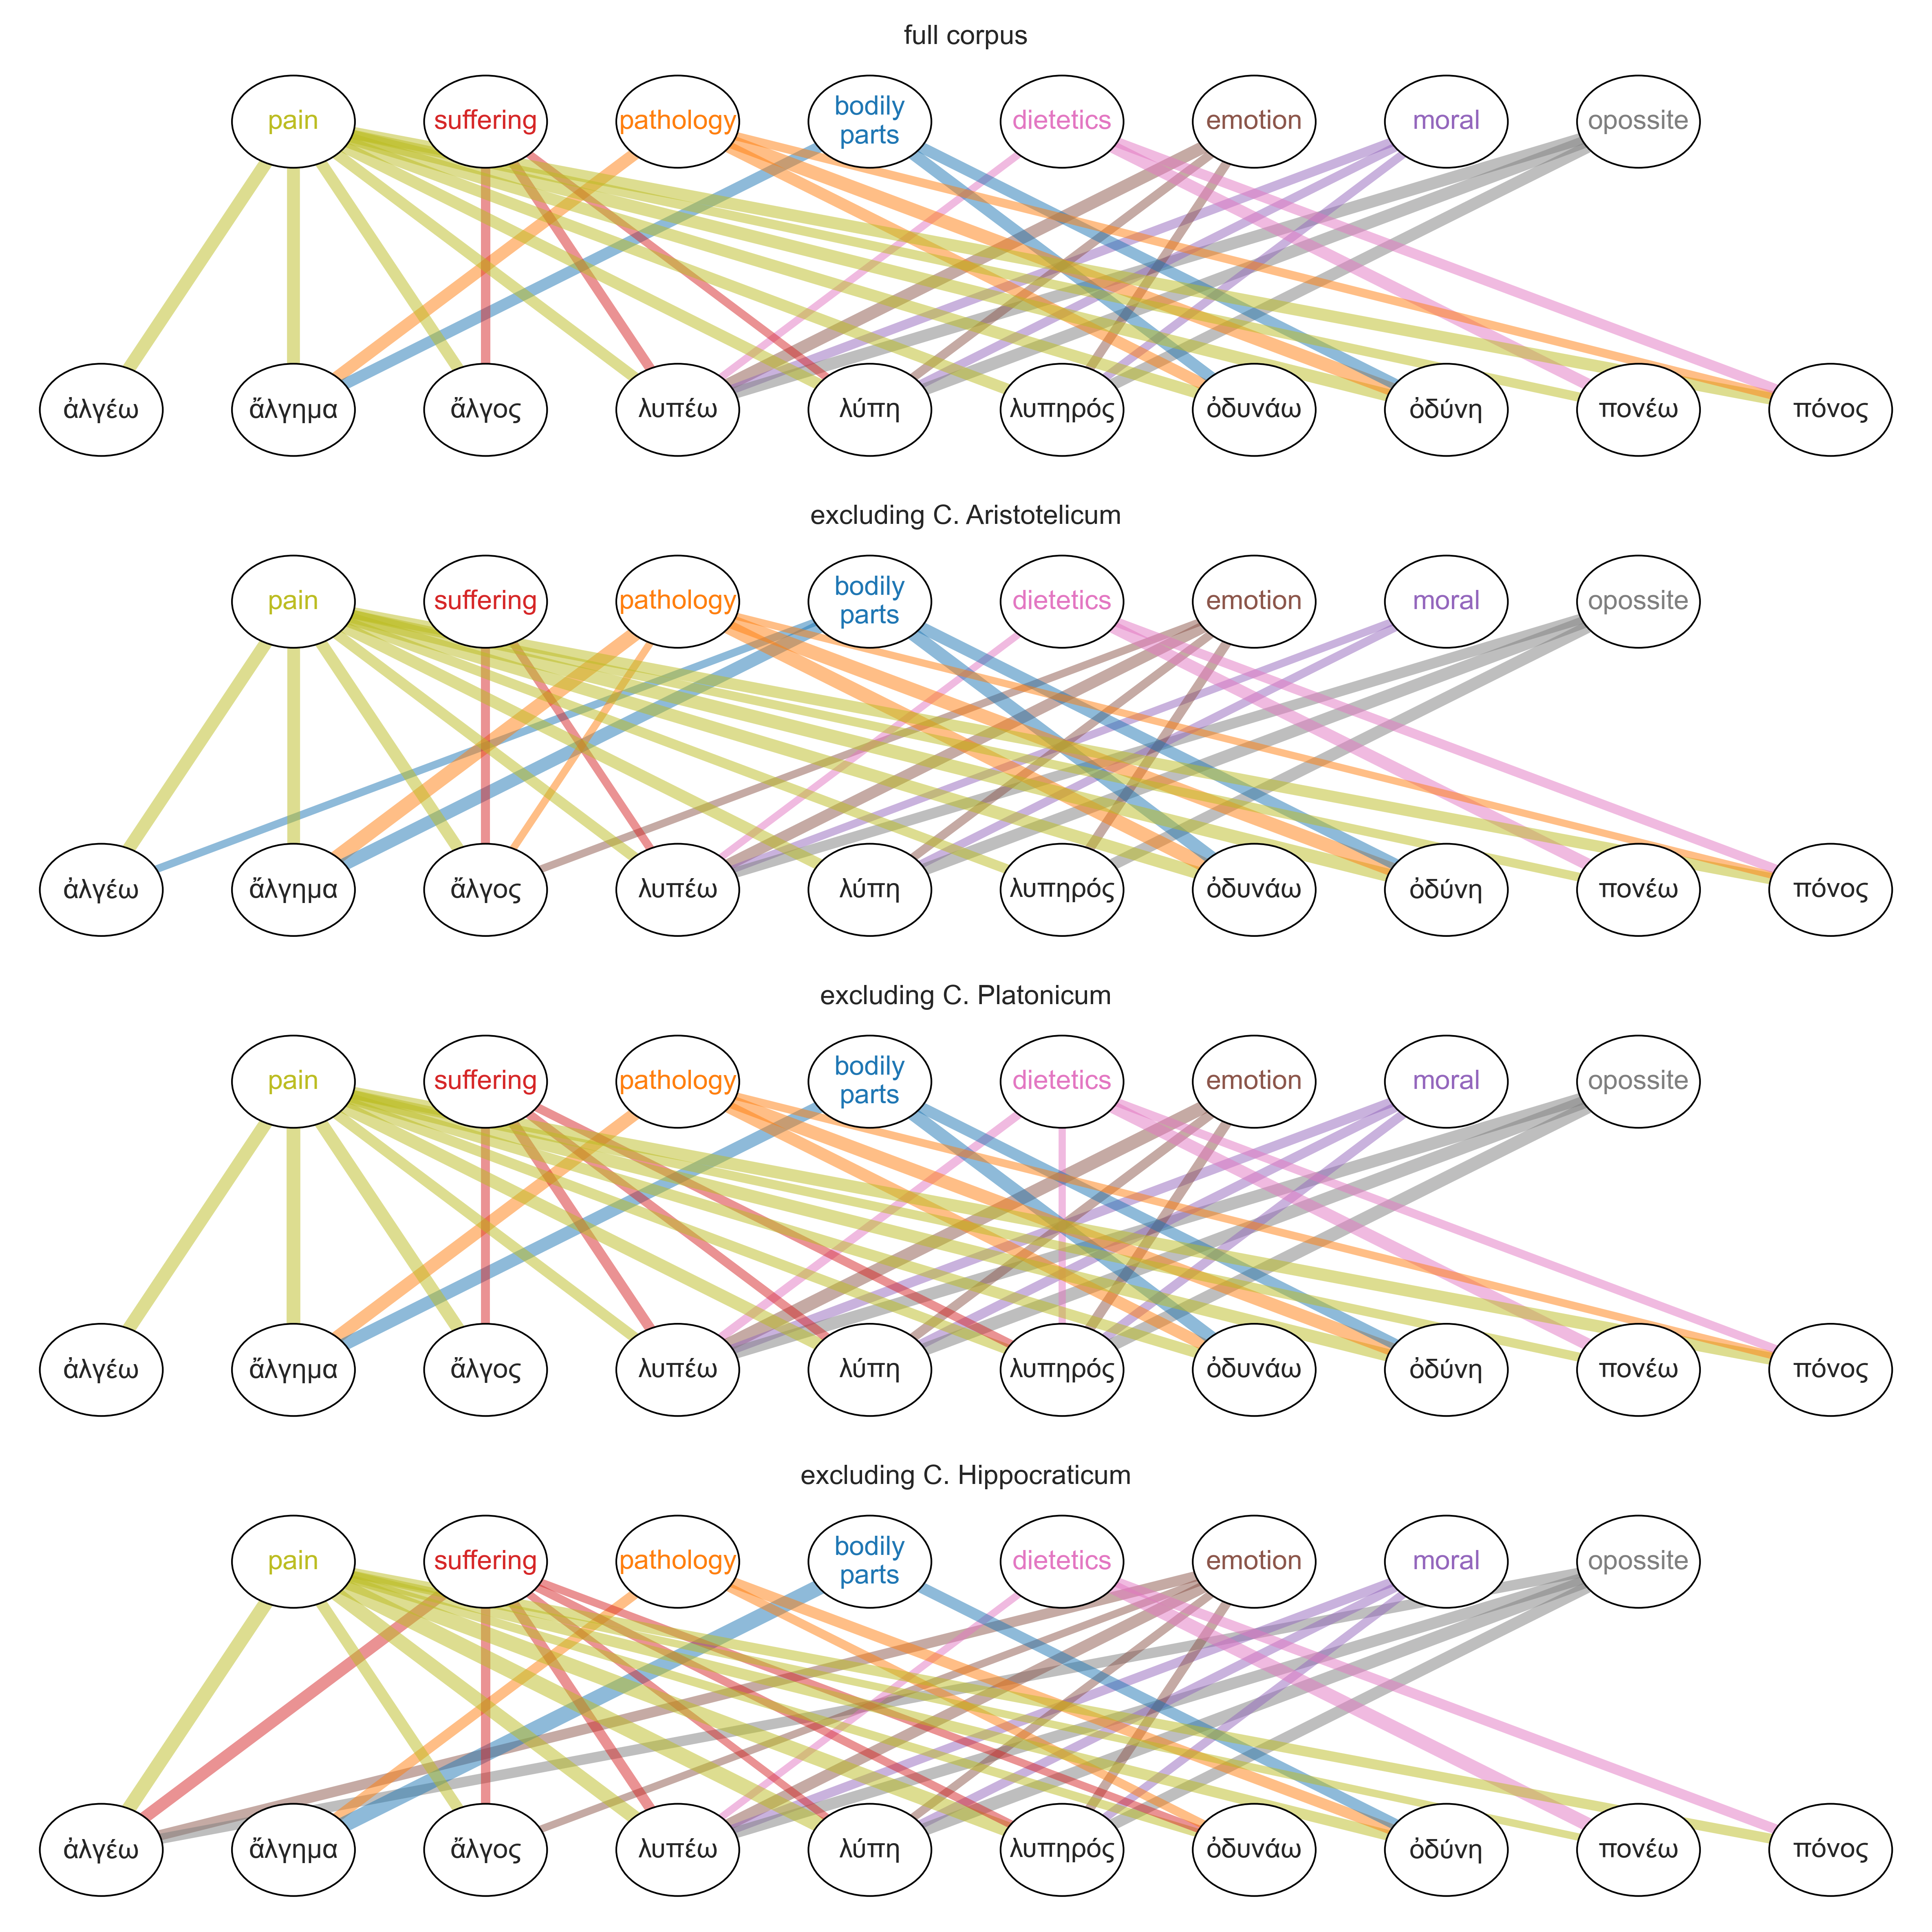

In [511]:
width_coef = 6
fig, axs = plt.subplots(4,1, figsize=(8, 8), tight_layout=True, dpi=600)

for ax, keyed_vectors, title in zip(axs.ravel(), vectors_list, titles):
    sim_tups = get_sim_tups(keyed_vectors)
    for n, word in enumerate(keywords):
        ax.text(x=n, y=0, s=word, fontsize=8,  horizontalalignment='center', verticalalignment='center') # color=color_dict[word],
        circle = patches.Circle(xy=(n, 0), radius=0.32, facecolor="white", linewidth=0.5, edgecolor="black", zorder=2)
        ax.add_patch(circle)
    for n, word in enumerate(categories):
        ax.text(x=n+1, y=2, s="\n".join(word.split()), fontsize=8, horizontalalignment='center', verticalalignment='center', color=color_dict[word])
        circle = patches.Circle(xy=(n+1, 2), radius=0.32, facecolor="white", linewidth=0.5, edgecolor="black", zorder=2)
        ax.add_patch(circle)

    for tup, coord in zip(sim_tups, coords):
        if tup[2] > 0.35:
            ax.plot(coord[0], coord[1], linewidth=tup[2]*width_coef, zorder=1, color=color_dict[tup[1]], alpha=0.5)

    ax.set_xlim(-0.4, len(keywords) - 0.6)
    ax.set_ylim(-0.4, 2.4)
    ax.axis(False)
    ax.set_title(title, fontsize=8)

In [512]:
fig.savefig("../figures/painwords_category_similarities.png")

In [513]:
sim_tups_combined = []
for keyed_vectors in vectors_list:
    sim_tups = get_sim_tups(keyed_vectors)
    sim_tups_dict = dict([(tup[0] + "-" + tup[1], tup[2]) for tup in  sim_tups])
    sim_tups_combined.append(sim_tups_dict)

In [514]:
0.65 / 0.64

1.015625

In [515]:
sim_tups_combined_df = pd.DataFrame(sim_tups_combined).T
sim_tups_combined_df.columns = titles
sim_tups_combined_df

,full corpus,excluding C. Aristotelicum,excluding C. Platonicum,excluding C. Hippocraticum
ἀλγέω-pain,0.6422,0.6335,0.6469,0.6929
ἀλγέω-suffering,0.3224,0.3057,0.3275,0.5911
ἀλγέω-pathology,0.2954,0.3359,0.3301,0.2290
ἀλγέω-bodily parts,0.3143,0.3785,0.3488,0.1503
ἀλγέω-dietetics,0.1594,0.1018,0.1627,0.1558
ἀλγέω-emotion,0.2743,0.2951,0.3028,0.5104
ἀλγέω-moral,0.1741,0.1121,0.1783,0.3189
ἀλγέω-opossite,0.2497,0.2515,0.2480,0.5067
ἄλγημα-pain,0.6331,0.6268,0.6748,0.0731
ἄλγημα-suffering,0.0427,-0.0211,-0.0082,-0.1320


In [516]:
cols = ["excl. Arist diff.", "excl. Plato diff.", "excl Hipp. diff."]
diffs_cols = {}
for col, colnames in zip(sim_tups_combined_df.columns[1:], cols):
    diffs_cols[colnames] = sim_tups_combined_df[col] / sim_tups_combined_df["full corpus"]

In [517]:
diffs_cols_df = pd.DataFrame(diffs_cols)
diffs_cols_df

,excl. Arist diff.,excl. Plato diff.,excl Hipp. diff.
ἀλγέω-pain,0.986453,1.007319,1.078947
ἀλγέω-suffering,0.948201,1.015819,1.833437
ἀλγέω-pathology,1.137102,1.117468,0.775220
ἀλγέω-bodily parts,1.204263,1.109768,0.478206
ἀλγέω-dietetics,0.638645,1.020703,0.977415
ἀλγέω-emotion,1.075829,1.103901,1.860736
ἀλγέω-moral,0.643883,1.024124,1.831706
ἀλγέω-opossite,1.007209,0.993192,2.029235
ἄλγημα-pain,0.990049,1.065866,0.115464
ἄλγημα-suffering,-0.494145,-0.192037,-3.091335


<AxesSubplot:>

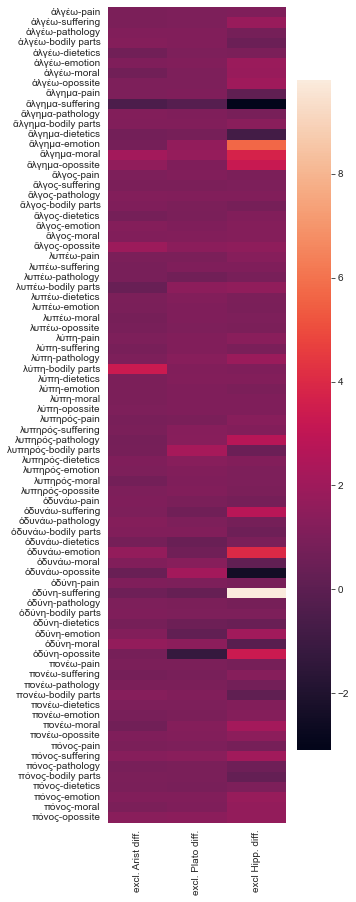

In [518]:
fig, ax = plt.subplots(figsize=(4,15))
sns.heatmap(diffs_cols_df, ax=ax)